In [14]:
# 景気循環期の日経平均株価の年間変化率の算出

states = ['recover', 'growth', 'stable', 'bubble', 'reform', 'now']
print(states)

['recover', 'growth', 'stable', 'bubble', 'reform', 'now']


In [15]:
dates = ["1945/5/16", "1954/12/1", "1972/1/1", "1986/12/1", "1993/11/1", "2016/9/30"]
print(dates)

['1945/5/16', '1954/12/1', '1972/1/1', '1986/12/1', '1993/11/1', '2016/9/30']


In [16]:
import pandas_datareader.data as pdr
import numpy as np

end = '2016/09/30'
n225 = pdr.DataReader("NIKKEI225", 'fred', "1949/5/16", end).NIKKEI225
# print(n225['1945/5/16' : '1954/12/1'])
print('rate of change')
for i in range(len(dates) - 1):
    pct_change = n225[dates[i]:dates[i + 1]].pct_change()
    ave = pct_change.mean() * 250
    print(states[i], ': %2.2f ％;' %(ave * 100))

print('\n')
print('volatility')
for i in range(len(dates) - 1):
    vol = np.log(n225[dates[i]:dates[i + 1]]).diff().std() * np.sqrt(250)
    print(states[i], ': %2.2f ％:' %(vol * 100))


rate of change
recover : 13.71 ％;
growth : 13.47 ％;
stable : 13.48 ％;
bubble : 3.49 ％;
reform : 2.16 ％;


volatility
recover : 22.99 ％:
growth : 14.45 ％:
stable : 12.64 ％:
bubble : 22.82 ％:
reform : 23.54 ％:


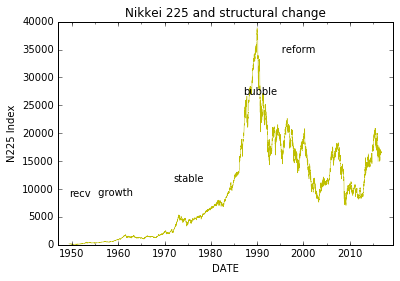

In [17]:
struct_break = [('1949/5/16', 'recv'), ('1954/12/1', ' growth'), ('1972/1/1', 'stable'), ('1986/12/1', 'bubble'), ('1991/3/1', '      reform')]
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
n225.plot(ax = subplot, style = 'y-', linewidth = 0.5)
plt.ylabel('N225 Index')
for date, label in struct_break:
    subplot.annotate(
        label,
        xy = (date, n225.asof(date) + 1000),
        xytext = (date, n225.asof(date) + 10000),
        horizontalalignment = 'left',
        verticalalignment = 'top'
    )
    subplot.set_xlim(['1947/1/1', '2019/4/25'])

plt.title("Nikkei 225 and structural change")